# Laboratorio 7: Clasificaci√≥n ü§ó

<center><strong>MDS7202: Laboratorio de Programaci√≥n Cient√≠fica para Ciencia de Datos - Primavera 2024</strong></center>


### Cuerpo Docente:

- Profesores: Ignacio Meza, Sebasti√°n Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicol√°s Ojeda, Melanie Pe√±a, Valentina Rojas

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no ser√°n revisados

- Nombre de alumno 1: Carolina N√∫√±ez
- Nombre de alumno 2: Alonso Uribe


### **Link de repositorio de GitHub:** [Repositorioüíª](https://github.com/carinunez/Labs_MDS/)

### Temas a tratar
- Clasificaci√≥n en problemas desbalanceados
- Lightgbm y xgboost
- Pipelines

### Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente ser√°n respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.
- C√≥digo que no se pueda ejecutar, no ser√° revisado.



### Objetivos principales del laboratorio
- Comprender c√≥mo trabajar con problemas de clasificaci√≥n con clases desbalanceadas.
- Aplicar los modelos lightgbm y xgboost.
- Practicar Pipelines

# Parte Te√≥rica [12 puntos]




1. Explique cu√°l es la diferencia entre los datos de entrenamiento y validaci√≥n. [1 punto]

2. Explique cu√°l es el principal desaf√≠o al trabajar problemas de clasificaci√≥n con data no supervisada. [1 punto]

3. Explique en **sus palabras** qu√© es la matriz de confusi√≥n y para qu√© se utiliza. [1 puntos]

4. Escriba la f√≥rmula de las siguientes m√©tricas y explique con **sus palabras** c√≥mo se interpretan. [1 punto cada uno]

  * Accuracy
  * Precision
  * Recall
  * F1 score

5. Explique qu√© m√©trica recomendar√≠a para los siguientes contextos de clasificaci√≥n. [1 punto cada uno]

  * Mantenimiento predictivo de fallas de maquinaria pesada en la industria minera.  
  * Detecci√≥n de enfermedades altamente contagiosas.
  * Aprobaci√≥n de cr√©ditos de alto riesgo.
  * Detecci√≥n de cr√≠menes.

6. Explique qu√© es la calibraci√≥n de modelos y para qu√© se usa. [1 punto]


**Respuesta:**

1. Los datos de entrenamiento, tal como su nombre lo dice, son utilizados para entrenar el modelo. Mientras que los datos de validaci√≥n permiten medir que tan bueno es el modelo y con ello encontrar los hiperpar√°metros de este.

2. La falta de etiquetas hace que el algoritmo deba encontrar los patrones "ocultos" en los datos, cuando se tiene gran cantidad de datos el proceso puede ser muy costoso computacionalmente. Otro problema es que estos algoritmos tienden a caer en overfitting, disminuyendo la capacidad de generalizaci√≥n del modelo. Adem√°s, los resutlados son dif√≠ciles de interpretar ya no se conoce etiquetas.


3. La matriz de confusi√≥n permite reportar de manera clara la cantidad de datos/observaciones que fueron asignadas a clase correcta y las que no.

4. - Accuracy: $\frac{\text{num predicciones correctas}}{\text{Predicciones totales}} = \frac{\text{TP +TN}}{\text{Predicciones totales}}$ da cuenta de la exactitud del modelo, proporci√≥n de verdaderos positivos y verdaderos negativos.
   - Precision: $P= \frac{\text{TP}}{\text{TP + FP}}$ proporci√≥n de las clases bien predichas corresponeden a la clase de inter√©s (en el caso de clasificaci√≥n binaria).
   - Recall: $R = \frac{\text{TP}}{\text{TP +FN}}$ porci√≥n de las observaciones clasificadas como positivas que realmente lo son.
   - F1 Score: $\frac{\text{2P*R}}{\text{P + R}}$ calcula una media arm√≥nica entre precision y recall por lo que es una m√©trica que balancea el resultado de cada una por si sola.

5. M√©tricas recomendadas:
   1. En el caso de la detecci√≥n de fallas, se esperar√≠a tener la menor cantidad de falsos positivos ya que esto podria generar atrasos o costos adicionales, de forma an√°loga de deber√≠a minimizar la cantidad de FN por lo que se debre√≠a priorizar tanto la precisi√≥n como el recall, es por ello que se deber√≠a poner atenci√≥n al f1 score.  

   2. Dado que se est√° detectando una enfermedad, lo que esperar√≠a es minimizar la cantidad de falsos negativos posibles, entonces se deber√≠a buscar un Recall cercano a 1.
   3. En este caso, asignar cr√©ditos a personas que no est√°n "aprobadas" ser√≠a lo m√°s perjudicial (falsos positivos) por lo que se deber√≠a tener en cuenta la precisi√≥n del modelo.
   4. Suponieno que lo que se desea es minimizar la cantidad de cr√≠menes dectados err√≥neamente, entonces hab√≠a que enfocarse en el Recall.
   
6. La calibraci√≥n de modelos permite eliminar sesgos propios de los modelos de ML y con ello poder realizar interpretaciones de mejor calidad.

# Parte pr√°ctica [48 puntos]

<p align="center">
  <img src="https://i.ibb.co/61L8z0w/renacin-by-volframio-dcirf4l-fullview.jpg"
" width="400">
</p>



Tras el tr√°gico despido de la m√≠tica mascota de Maip√∫, Renac√≠n decide adentrarse como consultor en el mercado futbolero, el cu√°l (para variar...) est√° cargado en especulaciones.

Como su principal tarea ser√° asesorar a los directivos de los clubes sobre cu√°l jugador comprar y cu√°l no, Renac√≠n desea generar modelos predictivos que evalu√©n distintas caracter√≠sticas de los jugadores; todo con el fin de tomar decisiones concretas basadas en los datos.

Sin embargo, su condici√≥n de corporeo le impidi√≥ tomar la versi√≥n anterior de MDS7202, por lo que este motivo Renac√≠n contrata a su equipo para lograr su objetivo final. Dado que a√∫n tiene fuertes v√≠nculos con la direcci√≥n de deportes de la municipalidad, el corporeo le entrega base de datos con las estad√≠sticas de cada jugador para que su equipo empieze a trabajar ya con un dataset listo para ser usado.


**Los Datos**

Para este laboratorio deber√°n trabajar con el csv `statsplayers.csv`, donde deber√°n aplicar algoritmos de aprendizaje supervisado de clasificaci√≥n en base a caracter√≠sticas que describen de jugadores de f√∫tbol.

Para comenzar cargue el dataset se√±alado y a continuaci√≥n vea el reporte **`Player_Stats_Report.html`** (adjunto en la carpeta del enunciado) que describe las caracter√≠sticas principales del `DataFrame`.

In [1]:
# Si usted est√° utilizando Colabolatory le puede ser √∫til este c√≥digo para cargar los archivos.
# try:
#     from google.colab import drive
#     drive.mount("/content/drive")
#     path = 'Direcci√≥n donde tiene los archivos en el Drive'
# except:
#     print('Ignorando conexi√≥n drive-colab')

## 1. Predicci√≥n de Seleccionados Nacionales [14 puntos]

<p align="center">
  <img src="https://www.futuro.cl/wp-content/uploads/2016/06/chile-argentina-meme-12.jpg" width="300">
</p>



### 1.1 Preprocesamiento [5 puntos]

Tareas:

1. Genere los labels para la clasificaci√≥n binaria en una variable llamada `label`. Para esto, trabaje sobre el atributo `National_Position` suponiendo que los valores nulos son jugadores no seleccionados para representar a su pa√≠s. [Sin puntaje]

2. Hecho esto, ¬øcu√°ntos se tienen ejemplos por cada clase? Comente lo que observa. [1 punto]

3. Genere un `ColumnTransformer` en donde especifique las transformaciones que hay que realizar para cada columna (por ejemplo StandarScaler, MinMaxScaler, OneHotEncoder, etc...) para que puedan ser utilizadas correctamente por el modelo predictivo y gu√°rdelo una variable llamada `col_transformer`. [2 puntos]

4. Comente y justifique las transformaciones elegidas sobre cada una de las variables (para esto utilice el material `Player_Stats_Report.html` que viene en el zip del lab), al igual que las transformaciones aplicadas. [2 puntos]

**Respuesta:**

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Librerias utiles
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [3]:
df = pd.read_csv('stats_players.csv')
df_copy = df.copy()

df.head(5)

Name Nationality National_Position Club_Position  Height  \
0  Cristiano Ronaldo    Portugal                LS            LW     185   
1       Lionel Messi   Argentina                RW            RW     170   
2             Neymar      Brazil                LW            LW     174   
3        Luis Su√°rez     Uruguay                LS            ST     182   
4       Manuel Neuer     Germany                GK            GK     193   

   Weight Preffered_Foot  Age        Work_Rate  Weak_foot  ...  Agility  \
0      80          Right   32       High / Low          4  ...       90   
1      72           Left   29  Medium / Medium          4  ...       90   
2      68          Right   25    High / Medium          5  ...       96   
3      85          Right   30    High / Medium          4  ...       86   
4      92          Right   31  Medium / Medium          4  ...       52   

   Jumping  Heading  Shot_Power  Finishing  Long_Shots  Curve  \
0       95       85          92         93          90     81   
1       68       71          85         95          88     89   
2       61       62          78         89          77     79   
3       69       77          87         94          86     86   
4       78       25          25         13          16     14   

   Freekick_Accuracy  Penalties  Volleys  
0                 76         85       88  
1                 90         74       85  
2                 84         81       83  
3                 84         85       88  
4                 11         47       11  

[5 rows x 39 columns]

In [4]:
df.shape

(17588, 39)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17588 entries, 0 to 17587
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               17588 non-null  object
 1   Nationality        17588 non-null  object
 2   National_Position  1075 non-null   object
 3   Club_Position      17587 non-null  object
 4   Height             17588 non-null  int64 
 5   Weight             17588 non-null  int64 
 6   Preffered_Foot     17588 non-null  object
 7   Age                17588 non-null  int64 
 8   Work_Rate          17588 non-null  object
 9   Weak_foot          17588 non-null  int64 
 10  Skill_Moves        17588 non-null  int64 
 11  Ball_Control       17588 non-null  int64 
 12  Dribbling          17588 non-null  int64 
 13  Marking            17588 non-null  int64 
 14  Sliding_Tackle     17588 non-null  int64 
 15  Standing_Tackle    17588 non-null  int64 
 16  Aggression         17588 non-null  int64

In [6]:
# Asigno 0 si National_Position es NaN, 1 si no.
df['label'] =  df['National_Position'].notnull().astype('int')

# Cant por clase
df.label.value_counts()

label
0    16513
1     1075
Name: count, dtype: int64

In [7]:
1075/(1075+16513)

0.061121219012963385

Al observar la cantidad de datos por clase es posible notar que la mayor√≠a de los jugadores no est√°n seleccionados y solo el 6% de ellos lo est√°.

In [8]:
df['Work_Rate'].str.split(' / ', expand=True).rename({0:'Work1', 1:'Work2'}, axis=1)

Work1   Work2
0        High     Low
1      Medium  Medium
2        High  Medium
3        High  Medium
4      Medium  Medium
...       ...     ...
17583  Medium  Medium
17584  Medium  Medium
17585    High  Medium
17586  Medium  Medium
17587  Medium  Medium

[17588 rows x 2 columns]

In [9]:
# def transf_workRate(dataframe):
#   # dataframe['WorkRate'] = dataframe.apply(lambda x: x.str.split(' / '))
#   serie = pd.Series(dataframe.copy().to_numpy()[:,0])
#   frame = dataframe.copy()
#   print(serie.str.split(' / ', expand=True))
#   frame[['Work1', 'Work2']] = serie.str.split(' / ', expand=True)
#   ord_enc = OrdinalEncoder()
#   frame.drop(columns="Work_Rate", inplace=True)
#   ord_enc.fit_transform(frame[['Work1', 'Work2']])
#   return dataframe

# def t_workRate(dataframe, indice):
#     serie = pd.Series(dataframe.copy().to_numpy()[:,0])
#     dataframe[f'Work_{indice}'] = serie.str.split(' / ')[indice]
#     l_enc = LabelEncoder(['Low', 'Medium', 'High'])
#     data[f'Work_{indice}'] = l_enc.fit_transform(dataframe[[f'Work_{indice}']])
#   return dataframe


In [10]:
from sklearn.impute import SimpleImputer

useless_cols = ['Name', 'Nationality', 'National_Position', 'Work_Rate']

highCorr_cols = ['Weight', 'Ball_Control', 'Dribbling', 'Standing_Tackle',
                 'Sliding_Tackle', 'Interceptions', 'Short_Pass', 'Acceleration',
                  'Curve', 'Long_Shots', 'Volleys', 'Finishing', 'Shot_Power',
                 'Freekick_Accuracy']

standard_cols = ['Height', 'Weak_foot', 'Skill_Moves', 'Reactions', 'Vision',
                 'Composure', 'Speed', 'Strength', 'Balance', 'Agility',
                 'Jumping', 'Penalties', 'Aggression']

min_max_cols = ['Marking', 'Crossing', 'Age', 'Long_Pass', 'Stamina', 'Heading']


pipe_club = Pipeline([('imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
                       ('labels_encod', OrdinalEncoder())])

col_transformer = ColumnTransformer([
                         ('drop_cols', 'drop', useless_cols),
                         ('club_pipe', pipe_club, ['Club_Position']),
                         ('one_hot', OneHotEncoder(drop='first', sparse_output=False), ['Preffered_Foot']),
                         ('drop_hight_corr', 'drop', highCorr_cols),
                         ('standard', StandardScaler(), standard_cols),
                         ('min_max', MinMaxScaler(), min_max_cols)],
                         remainder='passthrough',
                         verbose_feature_names_out=False)

col_transformer.set_output(transform='pandas')

df_new = col_transformer.fit_transform(df)

In [11]:
df_new.head(4)

Club_Position  Preffered_Foot_Right    Height  Weak_foot  Skill_Moves  \
0           14.0                   1.0  0.583453   1.625071     3.614412   
1           24.0                   0.0 -1.663748   1.625071     2.274171   
2           14.0                   1.0 -1.064495   3.149676     3.614412   
3           27.0                   1.0  0.134013   1.625071     2.274171   

   Reactions    Vision  Composure     Speed  Strength  ...   Jumping  \
0   3.690524  2.213453   2.235484  1.880549  1.190025  ...  2.631689   
1   3.582707  2.556176   2.828708  1.525945 -0.485601  ...  0.269584   
2   2.827986  1.870729   1.790565  1.738707 -1.283518  ... -0.342814   
3   3.367072  2.144908   2.013024  0.816736  0.870858  ...  0.357069   

   Penalties  Aggression   Marking  Crossing       Age  Long_Pass   Stamina  \
0   2.257805    0.405838  0.213483  0.917647  0.500000   0.813953  0.964706   
1   1.564729   -0.454009  0.112360  0.835294  0.400000   0.930233  0.752941   
2   2.005777    0.004576  0.202247  0.811765  0.266667   0.790698  0.811765   
3   2.257805    1.265685  0.303371  0.835294  0.433333   0.662791  0.929412   

    Heading  label  
0  0.900000      1  
1  0.744444      1  
2  0.644444      1  
3  0.811111      1  

[4 rows x 22 columns]

In [12]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17588 entries, 0 to 17587
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Club_Position         17588 non-null  float64
 1   Preffered_Foot_Right  17588 non-null  float64
 2   Height                17588 non-null  float64
 3   Weak_foot             17588 non-null  float64
 4   Skill_Moves           17588 non-null  float64
 5   Reactions             17588 non-null  float64
 6   Vision                17588 non-null  float64
 7   Composure             17588 non-null  float64
 8   Speed                 17588 non-null  float64
 9   Strength              17588 non-null  float64
 10  Balance               17588 non-null  float64
 11  Agility               17588 non-null  float64
 12  Jumping               17588 non-null  float64
 13  Penalties             17588 non-null  float64
 14  Aggression            17588 non-null  float64
 15  Marking            

 **Justficaci√≥n de transformaciones**

1.   **'Name', 'Nationality':** fueron eliminadas ya que no aportan con informaci√≥n relevante.
2.   Se elimin√≥ **'National_Position'**  porque estaba correlacionada con las labels.
3.  **'Preffered_Foot'** se le aplic√≥ OneHotEncoder pues solo se tienen 2 categor√≠as y se dej√≥ como referencia si su pie preferido es el derecho.
4.**'Weight', 'Ball_Control', 'Dribbling', 'Standing_Tackle', 'Sliding_Tackle', 'Interceptions', 'Short_Pass', 'Acceleration', 'Curve', 'Long_Shots', 'Volleys', 'Finishing', 'Shot_Power','Freekick_Accuracy'** :  fueron eliminadas ya que estaban altamente correlacionadas con otras variables, por lo que solo dejamos una de ellas para no tener informaci√≥n redundante.
5. **'Height', 'Weak_foot', 'Skill_Moves', 'Reactions', 'Vision','Composure', 'Speed', 'Strength', 'Balance', 'Agility', 'Jumping', 'Penalties', 'Aggression'**: a estas variables se les aplic√≥ StandarScaler, pues al revisar la distribuci√≥n de estas, tienen una distribuci√≥n similar a Gaussiana por lo que se estandariz√≥ para dejar las variables con rangos similares.
6. **'Marking', 'Crossing', 'Age', 'Long_Pass', 'Stamina', 'Heading'** a estas variables se les aplic√≥ MinMaxScaler ya que no tienen una distribuci√≥n gaussiana pero al aplicar esta transformaci√≥n, todas las variables tendr√≠an el mismo rango de valores lo que ayudar√≠a a mejorar el rendimiento de los algoritmos.
7. Se cre√≥ una pipeline para **'Club_Position** para imputar el valor nulo por el m√°s frecuente en esa fila y luego se aplic√≥ LabelEncoder para tener solo datos n√∫mericos en el dataframe.

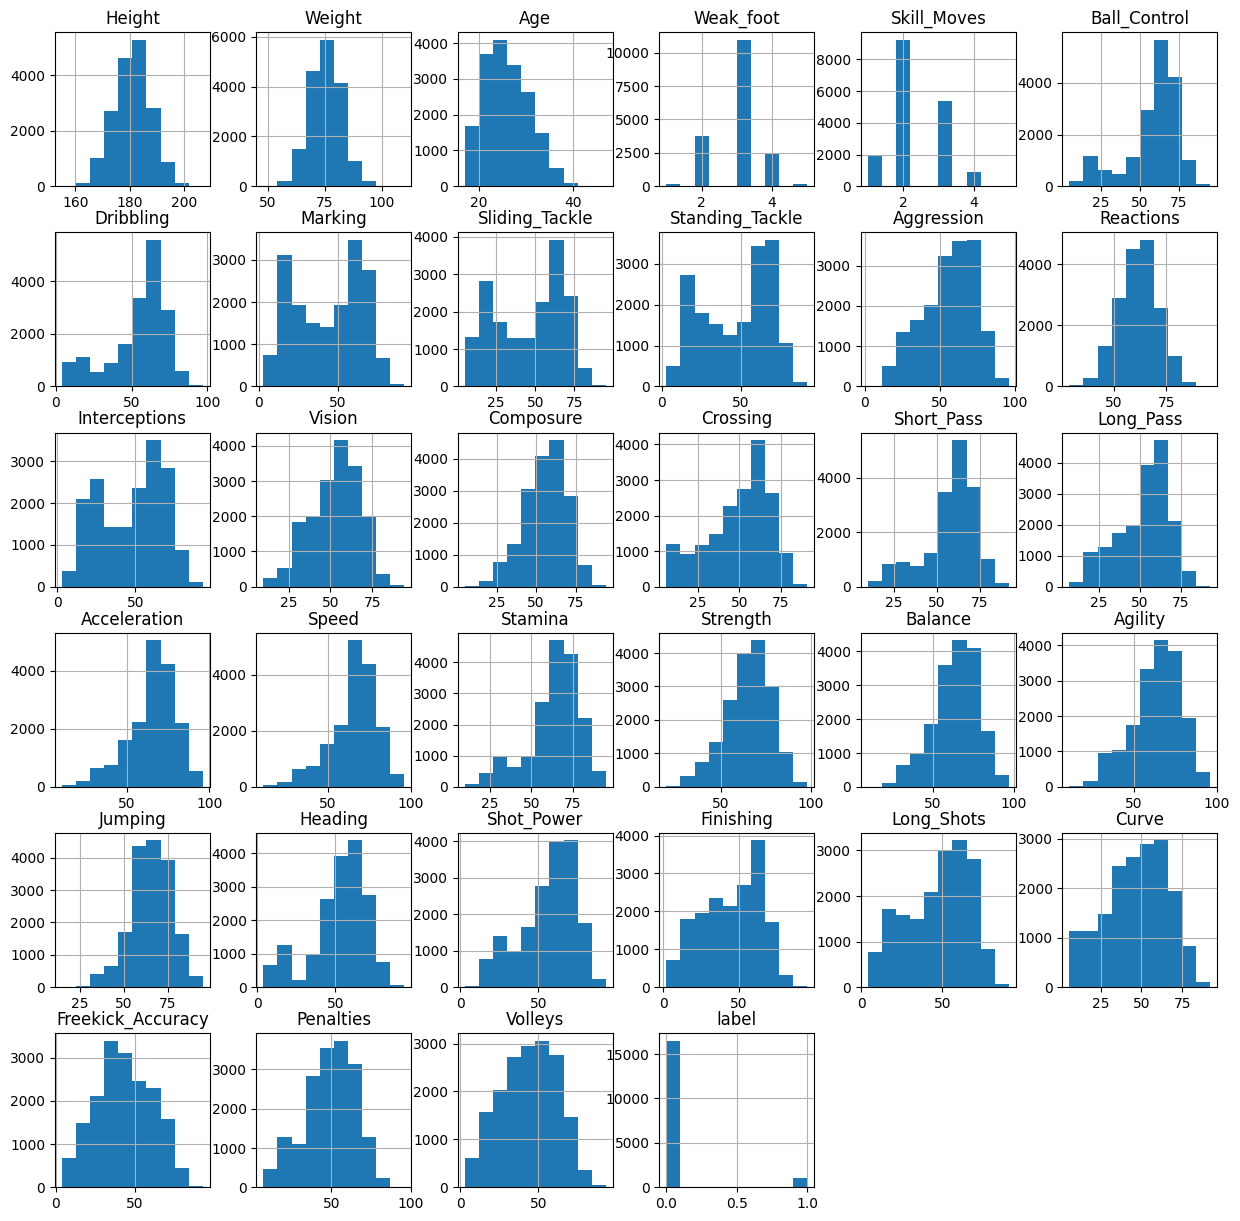

In [13]:
numerical_cols = (df.select_dtypes('number').columns.to_list())
df[numerical_cols].hist(figsize=(15, 15));

In [14]:
df_corr = df[numerical_cols].corr()
fig = go.Figure()
fig.add_trace(
    go.Heatmap(
        x = df_corr.columns,
        y = df_corr.index,
        z = np.array(df_corr),
        text=df_corr.values,
        texttemplate='%{text:.2f}'
        )
)
fig.update_layout(title_text='Correlaci√≥n entre las variables num√©ricas originales',
                    height=800, width=1200)
fig.show()

### 1.2 Entrenamiento [3 puntos]

Ahora, vamos a entrenar los pipelines generados en los pasos anteriores. Para esto, debe realizar las siguientes tareas:

1. Separe los datos de entrenamiento en un conjunto de entrenamiento y de prueba  (la proporci√≥n queda a su juicio). En este paso, seleccione los ejemplos de forma aleatoria e intente mantener la distribuci√≥n original de labels de cada clase en los conjuntos de prueba/entrenamiento. (vea la documentaci√≥n de `train_test_split`). [1 puntos]


2. Defina un pipeline llamado `pipeline_xgboost` y otro llamado `pipeline_lightgbm`. Estos pipelines deben tener el mismo ColumnTransformer definido en la secci√≥n de preprocesamiento, pero deben variar los clasificadores de acuerdo al nombre de cada pipeline. [1 puntos]

3. Entrene los pipelines. [1 punto]



**Respuesta:**

In [15]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split

X = df.drop(columns='label').copy()
y = df['label'].copy()

# Train Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42, shuffle=True,
                                                    stratify=y) #mantengo la prop de clases

# Pipeline
pipe_xgboost = Pipeline([('col_transf', col_transformer),
                            ('xgboost_classifier', XGBClassifier())])
pipe_lightlgbm = Pipeline([('col_transf', col_transformer),
                            ('lgbm_classifier', LGBMClassifier(verbose=-1))])

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:


Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.




In [16]:
# Entrenamiento
xgb_pipe = pipe_xgboost.fit(X_train, y_train)
y_pred_xgb = pipe_xgboost.predict(X_test)

lgbm_pipe = pipe_lightlgbm.fit(X_train, y_train)
y_pred_lgbm = pipe_lightlgbm.predict(X_test)

### 1.3 Resultados [6 puntos]

1. Calcule las m√©tricas accuracy, precisi√≥n y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) para evaluar el rendimiento de los distintos modelos. Verifique sus resultados usando `classification_report`. [2 puntos]

2. Explique qu√© implican los valores de accuracy, precisi√≥n y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) y c√≥mo influye la cantidad de ejemplos por clase en los resultados obtenidos. [2 puntos]

3. Explique qu√© m√©trica le parece m√°s adecuada y concluya qu√© modelo tiene un mejor desempe√±o. [2 puntos]

**Respuesta:**

In [17]:
# M√©tricas
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score

print('M√©tricas XGBOOST')
print(' ')
print('Accuracy: ', accuracy_score(y_test, y_pred_xgb))
print('Precision: ', precision_score(y_test, y_pred_xgb))
print('Recall: ', recall_score(y_test, y_pred_xgb))
print(' ')
print('-----------     Classification Report     -----------')
print(classification_report(y_test, y_pred_xgb))

M√©tricas XGBOOST
 
Accuracy:  0.9378434716695092
Precision:  0.46987951807228917
Recall:  0.12074303405572756
 
-----------     Classification Report     -----------
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      4954
           1       0.47      0.12      0.19       323

    accuracy                           0.94      5277
   macro avg       0.71      0.56      0.58      5277
weighted avg       0.92      0.94      0.92      5277



Explicaci√≥n XGBoost
  1. Accuracy = 0.93784 da cuenta de que el 93.784% de las predicciones fueron realizadas correctamente (tanto clase positiva como negativa).
  2. Precisi√≥n = 0.4698 da cuenta de que solo el 47% de las predicciones de la clase positiva fueron realizadas correctamente.
  3. Recall = 0.1207 hace referencia a que solo el 12.07% de las predicciones realizadas efectivamente correspondan a la clase positiva (considerando true positive y false negative).

  Las m√©tricas calculadas coinciden con los valores reportados en el ``clasification_report``.


In [18]:
print('M√©tricas LightGBM')
print(' ')
print('Accuracy: ', accuracy_score(y_test, y_pred_lgbm))
print('Precision: ', precision_score(y_test, y_pred_lgbm))
print('Recall: ', recall_score(y_test, y_pred_lgbm))
print(' ')
print('-----------     Classification Report     -----------')
print(classification_report(y_test, y_pred_lgbm))

M√©tricas LightGBM
 
Accuracy:  0.9403069926094372
Precision:  0.5540540540540541
Recall:  0.12693498452012383
 
-----------     Classification Report     -----------
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      4954
           1       0.55      0.13      0.21       323

    accuracy                           0.94      5277
   macro avg       0.75      0.56      0.59      5277
weighted avg       0.92      0.94      0.92      5277



Explicaci√≥n LightGBM
  1. Accuracy = 0.9403 da cuenta de que el 94.03% de las predicciones fueron realizadas correctamente (tanto clase positiva como negativa).
  2. Precisi√≥n = 0.554 da cuenta de que solo el 55.4% de las predicciones de la clase positiva fueron realizadas correctamente.
  3. Recall = 0.1269 hace referencia a que solo el 12.69% de las predicciones realizadas efectivamente correspondan a la clase positiva (considerando true positive y false negative).

  Las m√©tricas calculadas coinciden con los valores reportados en el ``clasification_report``.


Es importante tener en cuenta que ambos modelos no son buenos para clasificar la clase de inter√©s, esto se puede deber a que la cantidad de muestras de esta es considerablemente menor en comparaci√≥n a la clase 0.

**Mejor m√©trica**

Como nos importa saber quienes efectivamente son seleccionados nacionales, lo que debemos hacer es revisar el Recall. Mientras mayor sea esta m√©trica, menor ser√° la cantidad de falsos negativos, es decir, de menor ser√° la cantidad de seleccionados nacionales que fueron clasificados err√≥neamente.
Bajo el argumento anterior, el mejor modelo ser√≠a LIghtGBM pues su recall es ligeramente mayor.

## 2. Predicci√≥n de posiciones de jugadores [4 puntos]

<p align="center">
  <img src="https://pbs.twimg.com/media/E1rfA1aWEAYU6Ny.jpg" width="300">
</p>

En una nueva jornada de desmesuradas transacciones deportivas, Renac√≠n escuch√≥ a sus colegas discutir acerca de que el precio de cada jugador depende en gran medida de la posici√≥n en la cancha en la que juega. Y adem√°s, que hay bastantes jugadores nuevos que no tienen muy claro en que posici√≥n verdaderamente brillar√≠an, por lo que actualmente puede que actualmente est√©n jugando en posiciones sub-optimas.

Viendo que los resultados del primer an√°lisis no son tan esperanzadores, el corporeo los comanda a cambiar su tarea: ahora, les solicita que construyan un **clasificador enfocado en predecir la mejor posici√≥n de los jugadores** en la cancha seg√∫n sus caracter√≠sticas.

Para lograr esto, primero, les pide que etiqueten de la siguiente manera los valores que aparecen en el atributo `Club_Position`, pidiendo que agrupen los valores en los siguientes grupos:

**Nota**:  Renac√≠n les recalca que **no deben utilizar los valores ```Sub``` y ```Res``` de esta columna**.

```python
ataque = ['ST', 'CF']
central_ataque = ['RW', 'CAM', 'LW']
central = ['RM', 'CM', 'LM']
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']
```

La elecci√≥n del clasificador se justificar en base a la siguiente [gu√≠a](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) y se deben comentar los resultados obtenidos en la clasificaci√≥n.

**Tareas:** [1 punto por tarea]

1. En un nuevo dataframe, aplique las etiquetas descritas anteriormente en cada uno de los valores se√±alados en esta secci√≥n y gu√°rdelos en la variable `label`.
2. Cuente cu√°ntos por clase quedan.
3. Entrene el nuevo pipeline y ejecute una evaluaci√≥n de este.  
4. Comente los resultados obtenidos.

**Respuesta:**

In [19]:
data = df_copy.copy()

In [20]:
# Como hay 1 dato nulo en Club_Position, primero har√© una imputaci√≥n por el valor
# m√°s frecuente y luego asignar√© las labels
data.dropna(subset = ['Club_Position'], inplace=True)


data.loc[(data['Club_Position']=='ST')| (data['Club_Position']=='CF'), 'label'] = 'ataque'

data.loc[(data['Club_Position']=='RW')| (data['Club_Position']=='CAM')
      |(data['Club_Position']=='LW'), 'label'] = 'central_ataque'

data.loc[(data['Club_Position']=='RM')| (data['Club_Position']=='CM')
      |(data['Club_Position']=='LM'), 'label'] = 'central'

data.loc[(data['Club_Position']=='RWB')| (data['Club_Position']=='CDM')
      |(data['Club_Position']=='LWB'), 'label'] = 'central_defensa'

data.loc[(data['Club_Position']=='RB')| (data['Club_Position']=='CB')
      |(data['Club_Position']=='LB'), 'label'] = 'defensa'

data.loc[(data['Club_Position']=='GK'), 'label'] = 'arquero'

# Elimina 'Sub' y 'Res'
index_drop = data.loc[(data['Club_Position']=='Sub')|(data['Club_Position']=='Res')].index.to_list()
data.drop(index=index_drop, inplace=True)


# Asignar√© 'Otro' para las otras posiciones que quedan
data.fillna({'label':'Otro'}, inplace=True)

In [21]:
# Datos por clase
data.label.value_counts()

label
nan                3010
defensa            1180
central             907
arquero             632
central_ataque      581
ataque              430
central_defensa     209
Name: count, dtype: int64

In [22]:
X_new = data.drop(columns='label').copy()

y_new = data['label'].copy()

# Train Test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_new, y_new, test_size=0.3,
                                                    random_state=42, shuffle=True,
                                                    stratify=y_new)

In [23]:
# Crear nuevo Pipeline con otro clasificado y comentar m√©tricas
data.shape

(6949, 40)

Dado que tenemos que predecir categor√≠as y que al dejar fuera las clases 'Sub' y 'Res' quedan 6950 filas, entonces se podr√≠a utilizar Linear SVC (seg√∫n la gu√≠a).

In [24]:
from sklearn.svm import LinearSVC

pipe_SVC = Pipeline([('col_transf', col_transformer),
                            ('linearSVC_classifier', LinearSVC())])

# Entrenamiento
svc_pipe = pipe_SVC.fit(X_train2, y_train2)
y_pred_svc = pipe_SVC.predict(X_test2)

# Metricas
print('-----------     Classification Report     -----------')
print(classification_report(y_test2, y_pred_svc))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:31: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



-----------     Classification Report     -----------
                 precision    recall  f1-score   support

        arquero       1.00      1.00      1.00       190
         ataque       0.62      0.99      0.76       129
        central       0.60      0.49      0.54       272
 central_ataque       0.55      0.55      0.55       174
central_defensa       0.00      0.00      0.00        63
        defensa       0.67      0.81      0.73       354
            nan       0.79      0.75      0.77       903

       accuracy                           0.73      2085
      macro avg       0.60      0.66      0.62      2085
   weighted avg       0.71      0.73      0.71      2085



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1237: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Tal como se puede observar, el modelo predice perfectamente a los ``arqueros``, y muy mal a ``central_defensa``. De modo general, es posible decir que el clasificador tiene un accuracy de 0.72, dando cuenta de que predice correctamente cerca del 72% de los datos.

Ahora, para ver si hay otro clasificador que permite observar un mejor rendimiento, observamos que nuestros datos luego del col_transformer no tendr√° datos num√©ricos por lo que podr√≠a ser buena idea utilizar KNeighbors, seg√∫n el diagrama de la [gu√≠a](https://scikit-learn.org/stable/machine_learning_map.html).



In [25]:
from sklearn.neighbors import KNeighborsClassifier

pipe_kn = Pipeline([('col_transf', col_transformer),
                            ('kneighbors_classifier', KNeighborsClassifier())])

# Entrenamiento
kn_pipe = pipe_kn.fit(X_train2, y_train2)
y_pred_kn = pipe_kn.predict(X_test2)

# Metricas
print('-----------     Classification Report     -----------')
print(classification_report(y_test2, y_pred_kn))

-----------     Classification Report     -----------
                 precision    recall  f1-score   support

        arquero       1.00      1.00      1.00       190
         ataque       0.96      0.99      0.98       129
        central       0.82      0.97      0.89       272
 central_ataque       0.94      0.86      0.89       174
central_defensa       0.92      0.75      0.82        63
        defensa       0.94      0.95      0.95       354
            nan       0.95      0.92      0.94       903

       accuracy                           0.93      2085
      macro avg       0.93      0.92      0.92      2085
   weighted avg       0.94      0.93      0.93      2085



Tal como se esperaba, el rendimiento mejor√≥ considerablemente,de hecho, todas las clases mejoraron sus m√©tricas. Si bien ``central_defensa`` sigue siendo una de las clases peor clasificadas, ahora tiene una precisi√≥n de 0.89 en lugar de 0.

## 3. Predicciones de Seleccionados Nacionales para el Jere Klein [30 puntos]

<center>
<img src='https://www.radioactiva.cl/wp-content/uploads/2024/04/Jere-Klein-1-768x432.webp' width=500 />

Despu√©s de alcanzar la fama como cantante urbano, Jere Klein decide explorar una nueva faceta. Con su amor por el f√∫tbol y convencido de que los artistas urbanos poseen un talento y versatilidad excepcionales, Jere se embarca en un proyecto innovador: desarrollar un sistema de inteligencia artificial capaz de identificar a jugadores que tienen potencial para convertirse en futbolistas profesionales. Su teor√≠a es que muchos artistas del g√©nero urbano chileno, con sus habilidades √∫nicas y su disciplina, podr√≠an destacarse tambi√©n en el deporte. Con este sistema, Jere espera no solo abrir nuevas oportunidades para sus colegas artistas, sino tambi√©n demostrar la amplia gama de talentos que pueden ofrecer.

### 2.1 ¬øQu√© modelo de √°rbol es m√°s de "pana"? [10 puntos]

<center>
<img src='https://64.media.tumblr.com/39189215a7d3d96823cb359f35b44e05/tumblr_psmrhrR3Xw1qf5hjqo4_540.gif' width=300 />


**Tareas**


1. Considerando el la variable llamada `label` creada en la secci√≥n 1.1. Para determinar cu√°l modelo de √°rbol ser√≠a m√°s adecuado para la tarea en cuesti√≥n, utilice PyCaret. Este deber√° centrarse exclusivamente en modelos de tipo √°rbol. Jere ha especificado que busca un modelo que tome decisiones r√°pidamente y que tenga una baja tasa de falsos positivos, ya que planea invertir en estos jugadores. [3 puntos]

Para la comparaci√≥n, utilice los siguientes modelos:

```python
['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost']
```

2. Explique en brevemente que son los modelos de la siguiente lista `['et', 'rf', 'dt']` y como funcionan. [3 punto]

  - et: Extra Trees Classifier
    
      Fitea de manera aleatoria √°rboles de decisi√≥n en subconjunto de los datos y promedia sus resultados para obtener un mejor modelo.

  - rf: Random Forest

      Similar a 'et' pero con bootstraping.

  - dt: Decision Tree Classifier
    
      El cl√°sico √°rbol de decisi√≥n, decide el mejor criterio para clasificar por categorias una entrada.

3. Tras realizar la comparaci√≥n de modelos, seleccione aquel que muestre el mejor rendimiento en t√©rminos de velocidad y precisi√≥n, especialmente en la reducci√≥n de falsos positivos. Utilice la funci√≥n `evaluate_model` de PyCaret para revisar y analizar los resultados obtenidos en los siguientes aspectos:

  - **Confusi√≥n Matrix**: ¬øC√≥mo se encuentran la tasa de verdaderos positivos y verdaderos negativos?
  - **Threshold**: ¬øEs acaso el umbral por defecto del modelo el mejor para las predicciones?
  - **Feature Importance**: ¬øCu√°les son las variables con mejor desempe√±o? ¬øA qu√© podr√≠a deberse esto?
  - **Learning Curve**: ¬øEl modelo presenta alg√∫n problema?

  [4 puntos]

**Respuesta**

In [26]:
#  !pip install pycaret

In [104]:
from pycaret.datasets import get_data
from pycaret.classification import *
import os

os.environ["PYCARET_CUSTOM_LOGGING_LEVEL"] = "CRITICAL"

# 1.1
clf = setup(df, target='label')

In [105]:
tree_models = ['et', 'rf', 'dt', 'xgboost', 'lightgbm']
best_model = compare_models(include=tree_models, n_select=5)

Processing:   0%|          | 0/29 [00:00<?, ?it/s]

El mejor en performance de falsos positivos o Precision es Extra Tree Classifier ('et')

In [56]:
evaluate_model(best_model[2])

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin‚Ä¶

**Confusion Matrix**: Los verdaderos positivos se priorizan a costa de tener muchos falsos positivos, los verdaderos negativos guardan una buena proporci√≥n en comparaci√≥n con los falsos negativos

**Threshold**: Debido al desvalance de clases, un threshold menos a 0.5 puede mejor el desempe√±o del modelo en todas las m√©tricas, pero para nuestro caso solo se necesita precision. Vale la pena estudiar esta curva en otros modelos para ver si puede mejorar la precision sin sacrificar su robustes.

**Feature Importance**: Nombre, National Position, Nationality, Reaction. Esto puede deberse a que lo m√°s importante de un jugador es la popularidad y el desempe√±o comparativo.

**Learning Curve**: El modelo tiene overfitting

### 2.2 Reducci√≥n de dimensionalidad [14 puntos]

<center>
<img src='https://i.kym-cdn.com/photos/images/original/002/258/560/668.gif' width=400 />

A pesar de los resultados obtenidos previamente, el manager de Jere ha solicitado el entrenamiento de un modelo de XGBoost utilizando los datos disponibles. Adem√°s, se debe proceder a realizar una reducci√≥n de dimensionalidad basada en la importancia de las caracter√≠sticas.

Para llevar a cabo esta tarea:

1. Inicie entrenando un modelo XGBoost con todas las caracter√≠sticas disponibles. [2 puntos]

2. Una vez el modelo est√© entrenado, eval√∫e y clasifique las caracter√≠sticas seg√∫n su importancia de forma descendente. [2 puntos]

3. Utilice esta clasificaci√≥n para ejecutar una b√∫squeda recursiva de eliminaci√≥n de caracter√≠sticas, eliminando progresivamente las menos importantes y evaluando el impacto en el desempe√±o del modelo hasta identificar las N caracter√≠sticas m√°s cr√≠ticas. [2 puntos]

4. Con este conjunto reducido de caracter√≠sticas, entrene un nuevo modelo y eval√∫e su rendimiento. [2 puntos]

5. Posteriormente, responda a las siguientes preguntas para una comprensi√≥n m√°s profunda de los cambios y beneficios:

  - ¬øEl rendimiento del modelo con las caracter√≠sticas seleccionadas es similar al del modelo original? ¬øC√≥mo se comparan en t√©rminos de precisi√≥n y robustez? [2 puntos]
  - ¬øCu√°les son los beneficios potenciales de eliminar variables del modelo? Considere factores como la simplificaci√≥n del modelo, reducci√≥n del tiempo de entrenamiento, y mejora en la capacidad de generalizaci√≥n. [2 puntos]
  - Comente si el modelo con menor dimensionalidad es m√°s sencillo de explicar. Explique brevemente por qu√© la eliminaci√≥n de ciertas caracter√≠sticas puede facilitar la comprensi√≥n y la explicaci√≥n del comportamiento del modelo. [2 puntos]

Notar que con esta metodologia buscamos encontrar un punto entermedio entre n√∫mero de festures y desempe√±o. por esto, si observa que al aumentar festires el aumento es despreciable, puede no considerar agregar m√°s features a su modelo.

**Respuesta**

In [83]:
xgboost = compare_models(include=['xgboost'])

Processing:   0%|          | 0/9 [00:00<?, ?it/s]

<Axes: >

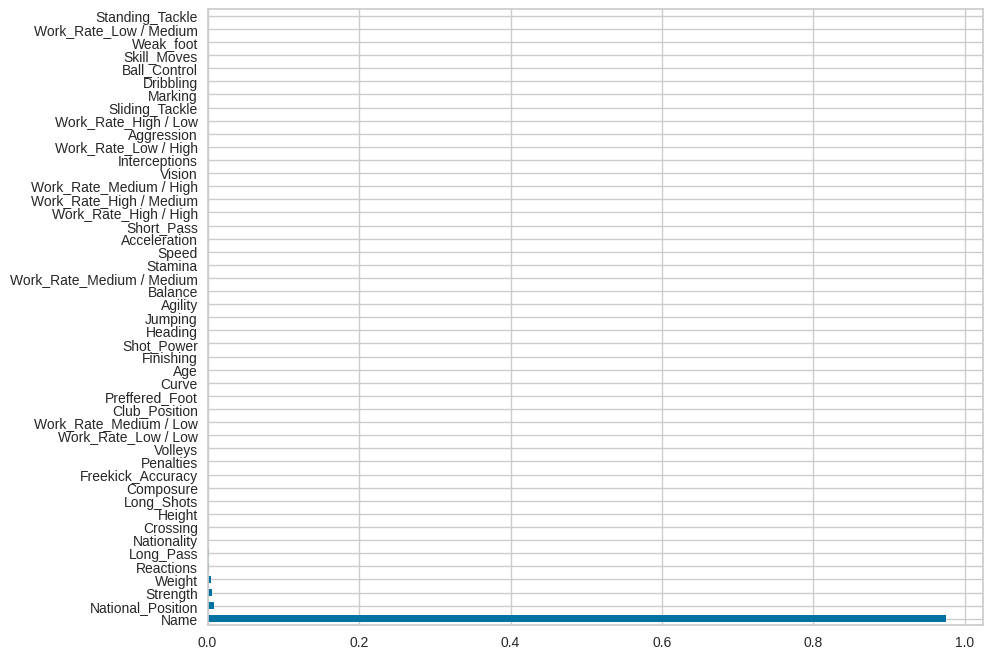

In [88]:
feat_importances = pd.DataFrame(
    xgboost.feature_importances_,
    xgboost.feature_names_in_,
    columns=["Importance"]
)
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='barh', figsize=(10,8), legend=False)

In [92]:
# 7 caracteristicas m√°s importantes
feat_importances[:7]

Importance
Name                 0.974578
National_Position    0.008143
Strength             0.006330
Weight               0.004860
Reactions            0.002387
Long_Pass            0.001577
Nationality          0.001018

In [60]:
new_df = df.copy()
new_df.drop(columns='Work_Rate', inplace=True)

def eliminate_var(n=6):
    clf = setup(new_df, target='label', verbose=False)
    xgboost = create_model('xgboost', verbose=False)
    feat_importances = pd.DataFrame(
    xgboost.feature_importances_,
    xgboost.feature_names_in_,
    columns=["Importance"]
    )
    feat_importances = feat_importances.sort_values(by='Importance', ascending=True)
    feat_importances.reset_index(inplace=True)
    droped = feat_importances.loc[0,"index"]
    # print(droped)
    new_df.drop(columns=droped, inplace=True)
    if n < len(new_df.columns):
      eliminate_var(n=n)

eliminate_var()

Vision
Volleys
Interceptions
Penalties
Freekick_Accuracy
Sliding_Tackle
Curve
Long_Shots
Finishing
Shot_Power
Heading
Jumping
Skill_Moves
Agility
Marking
Balance
National_Position
Standing_Tackle
Speed
Acceleration
Preffered_Foot
Dribbling
Club_Position
Height
Weak_foot
Age
Crossing
Stamina
Aggression
Strength
Long_Pass
Ball_Control
Short_Pass


In [61]:
new_df

Name          Nationality  Weight  Reactions  Composure  \
0      Cristiano Ronaldo             Portugal      80         96         86   
1           Lionel Messi            Argentina      72         95         94   
2                 Neymar               Brazil      68         88         80   
3            Luis Su√°rez              Uruguay      85         93         83   
4           Manuel Neuer              Germany      92         85         70   
...                  ...                  ...     ...        ...        ...   
17583        Adam Dunbar  Republic of Ireland      82         48         35   
17584       Dylan McGoey  Republic of Ireland      80         43         22   
17585    Tommy Ouldridge              England      61         42         35   
17586         Mark Foden             Scotland      80         46         28   
17587   Barry Richardson              England      77         38         44   

       label  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
17583      0  
17584      0  
17585      0  
17586      0  
17587      0  

[17588 rows x 6 columns]

In [94]:
# Nuevo modelo
clf2 = setup(new_df, target='label', verbose=False)
xgboost_new = create_model('xgboost', verbose=False)
feat_importances_new = pd.DataFrame(
    xgboost_new.feature_importances_,
    xgboost_new.feature_names_in_,
    columns=["Importance"]
    )

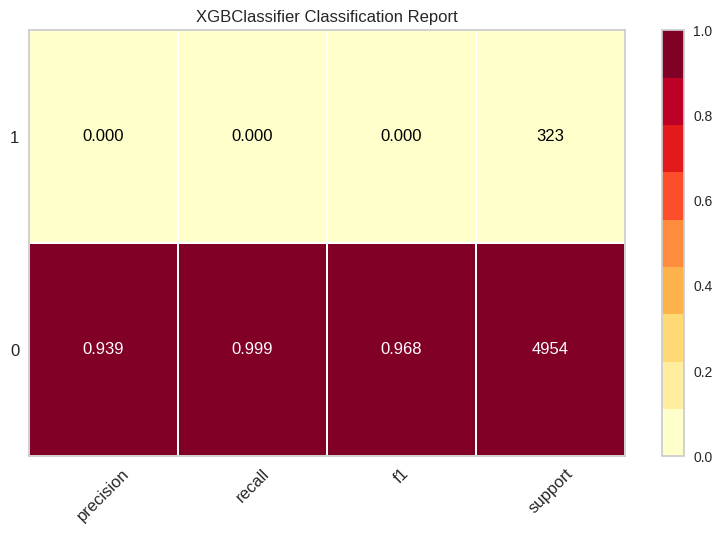

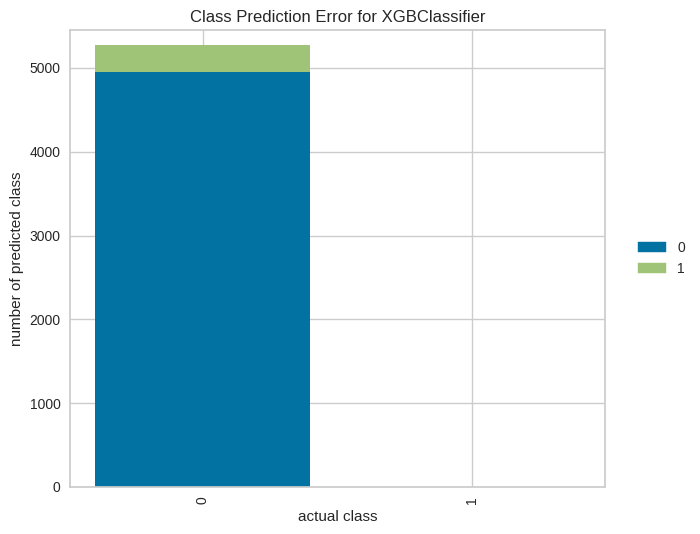

In [95]:
plot_model(xgboost_new, plot ='class_report')
plot_model(xgboost_new, plot ='error')


In [68]:
new_df.label.value_counts()

label
0    16513
1     1075
Name: count, dtype: int64

Al revisar el rendimiento del modelo es posible observar que no es capaz de aprender las caracter√≠sticas para predecir la clase 1, pues tal como ocurri√≥ antes, solo el 6.1% de los datos pertenecen a la clase de inter√©s. Entonces para mejorar el rendimiento del modelo habr√≠a que implementar alguna t√©cnica como Undersampling u Oversampling, por ejemplo.

5.
  - El nuevo modelo se comporta similar al original, pues ambos tienen un Recall de bajo para la clase de inter√©s, sin embargo el nuevo modelo tiene una mejora de la precisi√≥n para la clase 0.

  - Al eliminar variables, el entrenamiento tom√≥ menos tiempo. Sin embargo, tal como se pudo apreciar, esta reducci√≥n  de variables disminuy√≥ la capacidad del modelo para clasificar la variable de inter√©s. Adem√°s al preferir variables como Nombre o Nacionalidad, podr√≠a indicar que hay un sesgo para la clasificaci√≥n.

  - Considerando las variables del nuevo modelo, se podr√≠a decir que el hecho de que un jugador est√© clasificado o no depende se factores personales, m√°s que de la habilidad que presenten, pues este s√≥lo utiliza **'Name', 'Nationality', 'Weight', 'Composure' y 'Reactions'** para entrenar. Adem√°s, es posible notar que la mayor√≠a las variables eliminadas coinciden con las eliminadas en la Parte 1 debido a que estaban altamente correlacionadas.
  Si bien la eliminaci√≥n de caracter√≠sticas permite entender mejor qu√© factores son m√°s influyentes para determinar que jugador ser√° seleccionado nacional, no creo que las caracter√≠sticas que seleccion√≥ el modelo sean las mejores, ya que tal como se observ√≥ el modelo no fue capaz de clasificar correctamente a los seleccionados nacionales.



### 2.3 Calibraci√≥n Probabilistica [6 puntos]

<center>
<img src='https://media2.giphy.com/media/l2Je4Ku0Cx292KWv6/200w.gif?cid=6c09b952y0sihtq9tb6sz8j2023x3zxxp3qx1ocgonkpkblj&ep=v1_gifs_search&rid=200w.gif&ct=g' width=400 />

Para lograr modelos m√°s modulares, se recomienda realizar una calibraci√≥n del modelo entrenado anteriormente, con el objetivo de obtener salidas que reflejen mayor modularidad.

1. Se solicita que utilice un m√©todo de calibraci√≥n que asegure que las probabilidades generadas incrementen de manera mon√≥tona. Una m√©trica ampliamente utilizada para evaluar la precisi√≥n de la calibraci√≥n de un modelo es el Brier Score. Calcule el Brier Score para el modelo tanto antes como despu√©s de la calibraci√≥n. Esto le permitir√° realizar una comparaci√≥n cuantitativa y determinar si la calibraci√≥n ha mejorado el rendimiento del modelo. Para m√°s informaci√≥n sobre el Brier Score, puede consultar el siguiente enlace: [Scikit-Learn - Brier Score Loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html). [3 puntos]

2. Tras la calibraci√≥n, examine y comente los resultados obtenidos. A su an√°lisis a√±ada una comparaci√≥n visual de las ideales versus las salidas del modelo original (sin calibrar) y del modelo calibrado. [3 puntos]

**Respuesta**

In [110]:
# Aplicar una calibraci√≥n con incremento monot√≥nico de las prob-> regresion isot√≥nica
# Brier Score antes y despu√©s de calibrar
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import brier_score_loss

clf2 = setup(new_df, target='label', verbose=False)
xgboost_new = create_model('xgboost', verbose=False)


# Esta malito:c
print('Brian Score pre-calibraci√≥n', brier_score_loss(y, y_prob))

calibrated = CalibratedClassifierCV(xgboost_new, method='isotonic', cv=3)

print('Brian Score post-calibraci√≥n', brier_score_loss(y_true, y_prob))

In [112]:
help(create_model)

Help on function create_model in module pycaret.classification.functional:

create_model(estimator: Union[str, Any], fold: Union[int, Any, NoneType] = None, round: int = 4, cross_validation: bool = True, fit_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, probability_threshold: Optional[float] = None, experiment_custom_tags: Optional[Dict[str, Any]] = None, engine: Optional[str] = None, verbose: bool = True, return_train_score: bool = False, **kwargs) -> Any
    This function trains and evaluates the performance of a given estimator
    using cross validation. The output of this function is a score grid with
    CV scores by fold. Metrics evaluated during CV can be accessed using the
    ``get_metrics`` function. Custom metrics can be added or removed using
    ``add_metric`` and ``remove_metric`` function. All the available models
    can be accessed using the ``models`` function.
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >